# **CASE: APARELHOS CELULARES**

---

### Instalação de bibliotecas

In [1]:
# As bibliotecas utilizadas neste notebook já vêm pré-instaladas no Google Colab

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf                                            # Regressão logística
from statsmodels.stats.outliers_influence import variance_inflation_factor       # Cálculo do VIF
from sklearn.decomposition import PCA                                            # Redução de dimensões

### Leitura da base de dados

In [3]:
dados_aparelhos = pd.read_table("../Dados/Aparelhos_Celulares.txt", sep = "\t")

### Visualização da base de dados

In [4]:
display(dados_aparelhos)

,ID_MODELO,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,PROCESSADOR,NUCLEOS,PRECO
0,1,6.2,2560,1440,8,256,3100,20,12,0.00588,2.9,8,3069
1,2,6.0,2160,1080,4,64,3400,12,7,0.00455,2.2,8,1219
2,3,6.7,3200,1440,3,32,5000,16,10,0.00500,2.6,8,3259
3,4,6.2,2376,1080,12,256,2400,32,16,0.00439,3.0,8,2449
4,5,6.5,2960,1440,4,64,6000,108,32,0.00606,3.1,8,4309
5,6,6.3,2400,1080,6,128,3400,30,15,0.00465,2.9,8,1949
6,7,6.1,2230,1080,4,64,4000,108,40,0.00571,2.0,4,2379
7,8,6.7,3200,1440,3,32,4300,48,24,0.00571,2.2,8,3719
8,9,6.3,2400,1080,6,128,3100,48,20,0.00556,2.7,8,2619
9,10,5.9,1920,1080,6,128,3200,13,8,0.00476,2.8,8,1629


### Análise exploratória

In [5]:
# Medidas resumo
dados_aparelhos.drop(columns = ['ID_MODELO']).describe()

,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,PROCESSADOR,NUCLEOS,PRECO
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,6.243636,2483.672727,1184.181818,5.909091,153.600000,3821.818182,38.109091,16.436364,0.005460,2.494545,7.345455,2632.818182
std,0.367052,367.175155,167.253754,2.716702,138.550379,783.082917,29.917586,9.643197,0.000707,0.364853,1.493420,883.128888
min,5.400000,1920.000000,960.000000,2.000000,16.000000,2400.000000,8.000000,5.000000,0.004350,1.800000,4.000000,1089.000000
25%,6.050000,2230.000000,1080.000000,4.000000,64.000000,3200.000000,16.000000,10.000000,0.005000,2.200000,8.000000,1994.000000
50%,6.300000,2340.000000,1080.000000,6.000000,128.000000,4000.000000,30.000000,14.000000,0.005410,2.500000,8.000000,2509.000000
75%,6.500000,2688.000000,1440.000000,8.000000,256.000000,4350.000000,50.000000,20.000000,0.005880,2.800000,8.000000,3139.000000
max,6.900000,3200.000000,1440.000000,12.000000,512.000000,6000.000000,108.000000,40.000000,0.007140,3.100000,8.000000,4749.000000


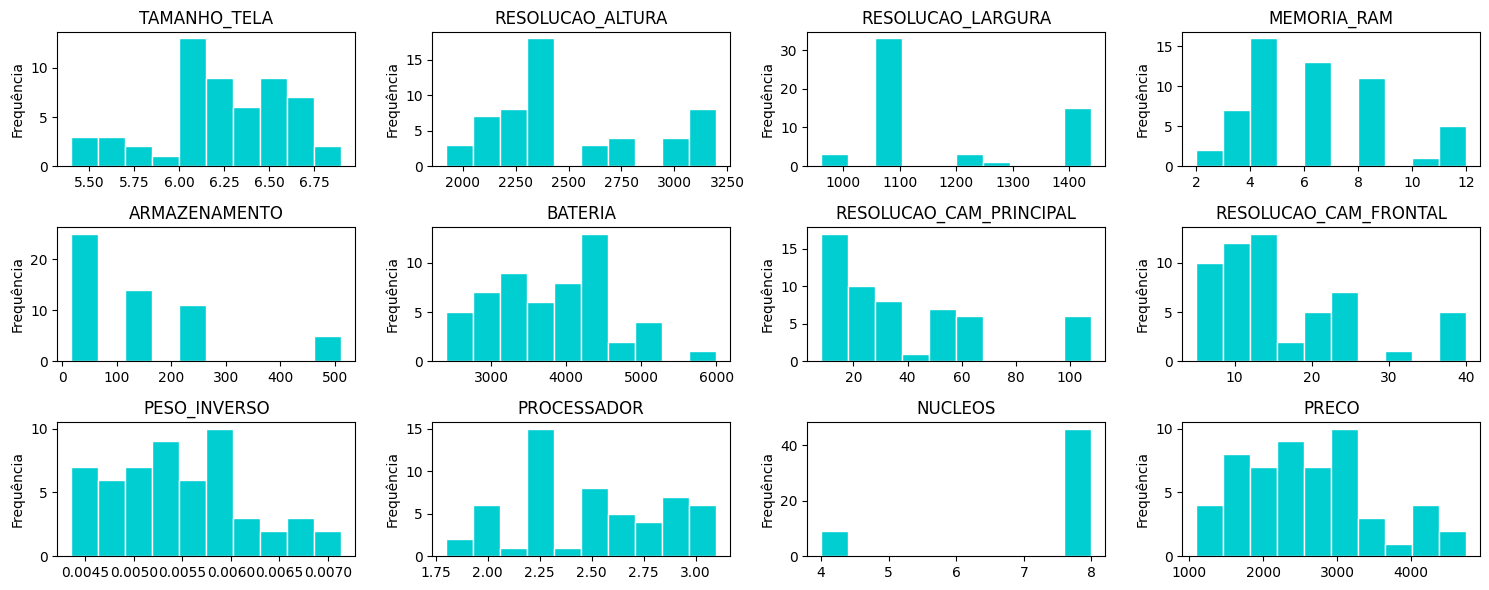

In [6]:
# Histogramas
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 6))

variaveis = dados_aparelhos.columns[1:]

for ax, variavel in zip(axes.flat, variaveis):

  ax.hist(dados_aparelhos[variavel], bins = 10, color = 'darkturquoise', edgecolor = 'white')
  ax.set_title(variavel)
  ax.set_xlabel('')
  ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

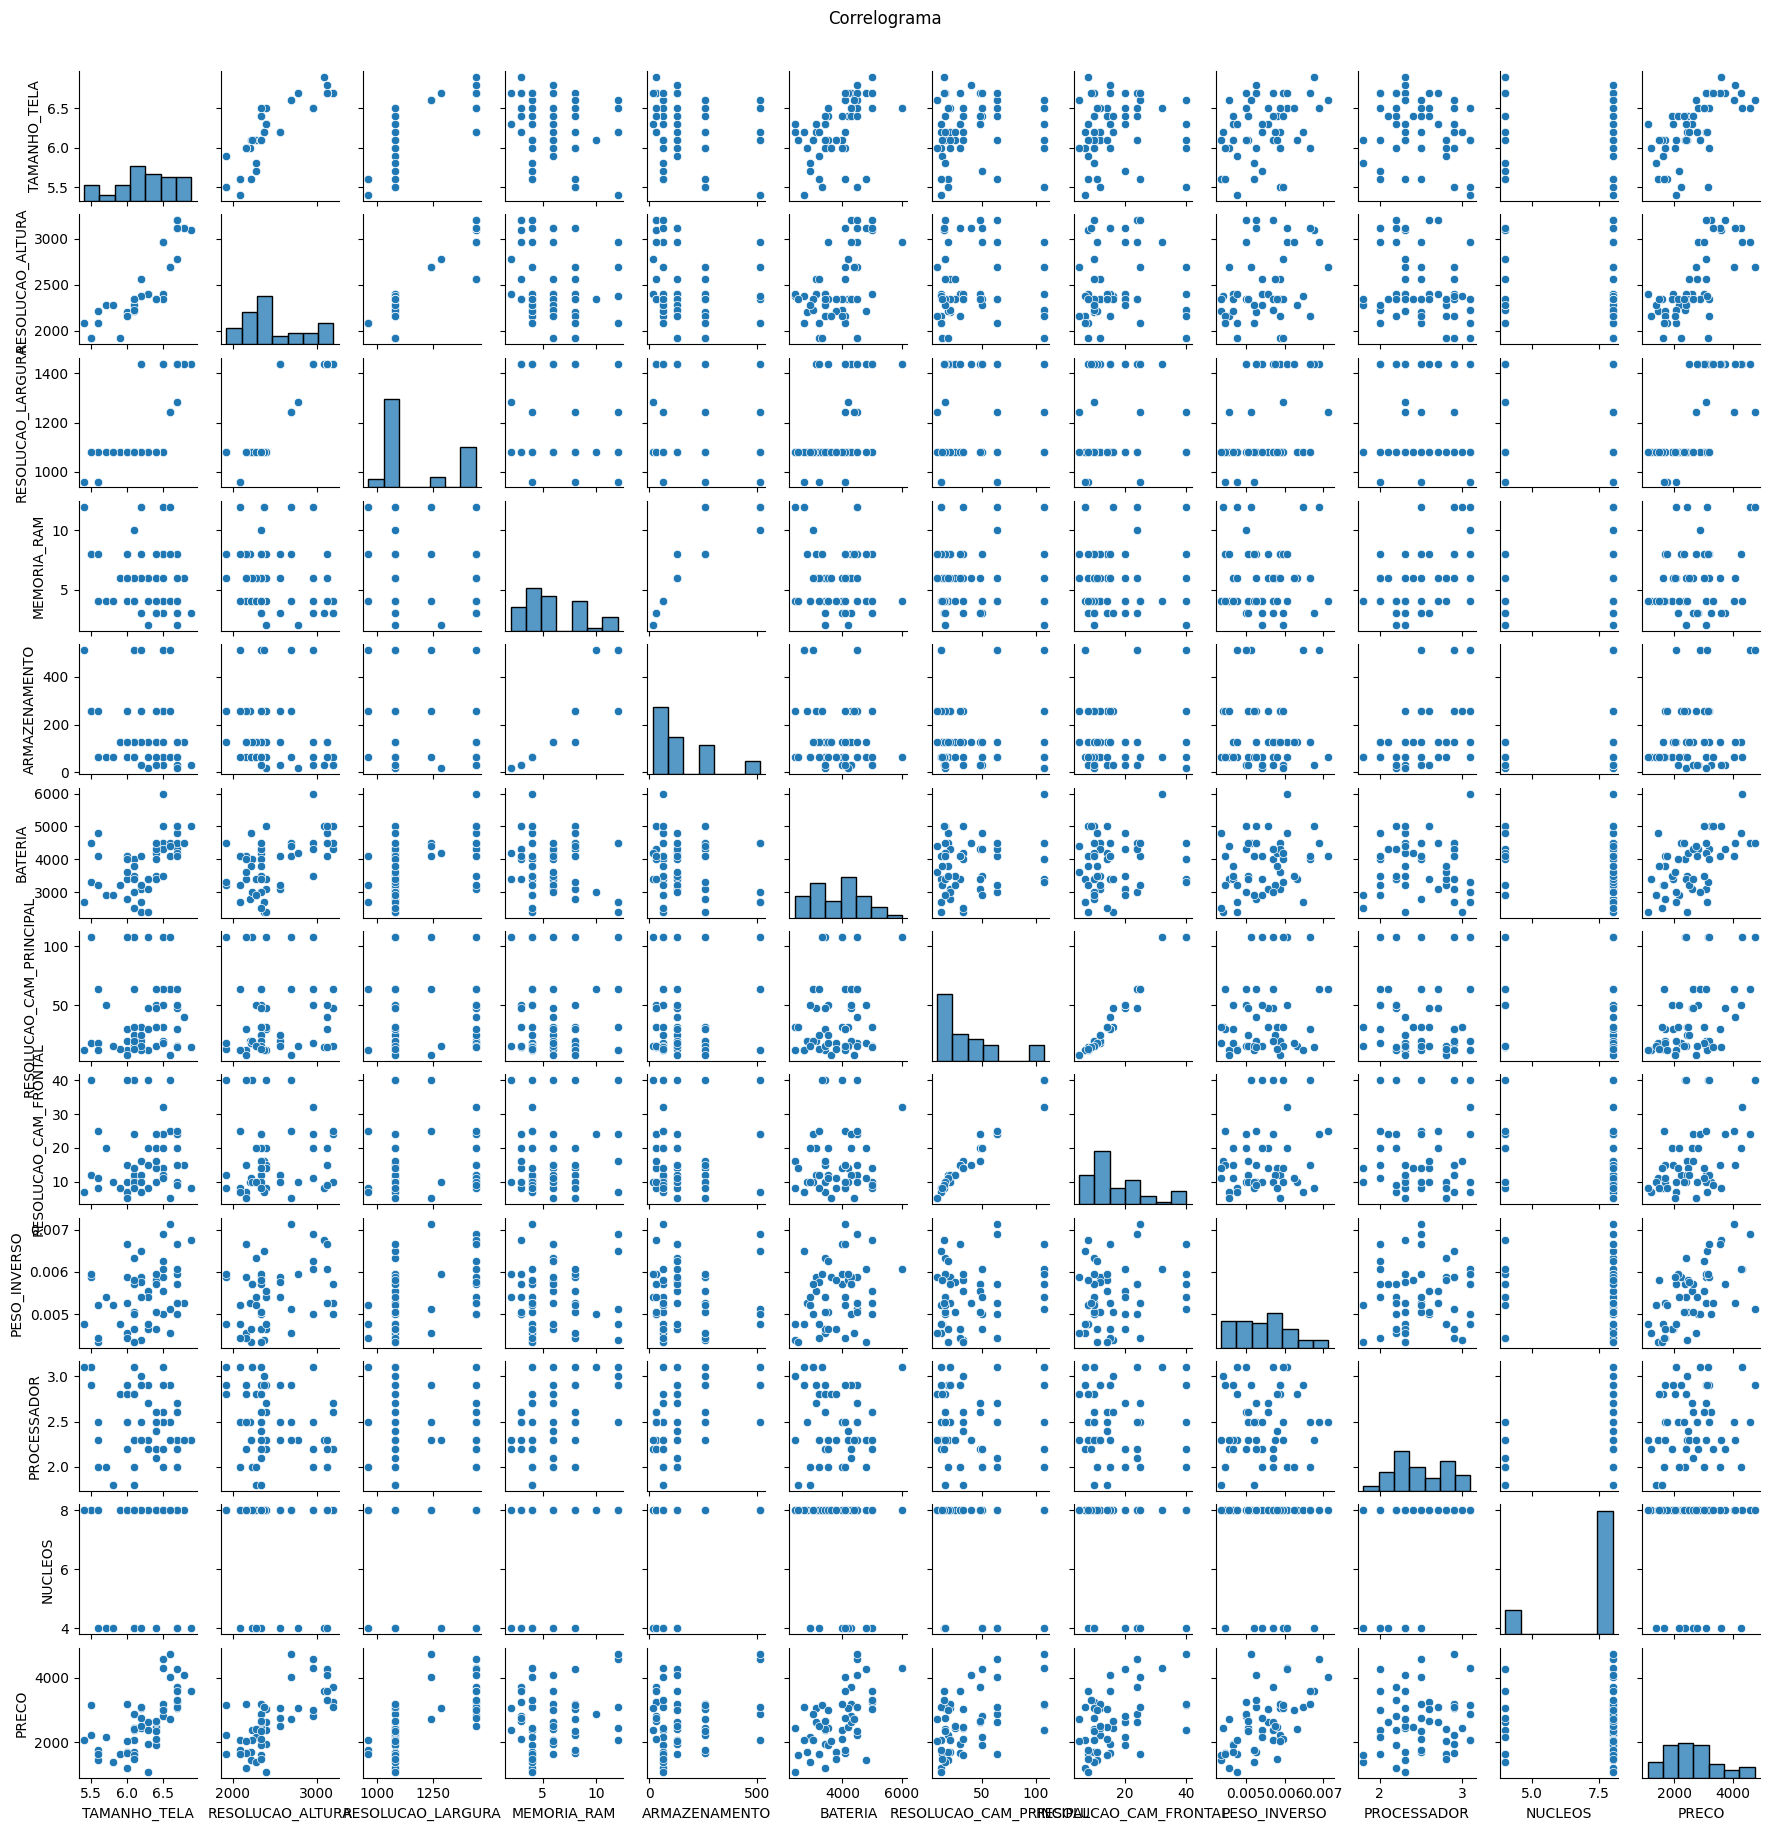

In [7]:
# Correlograma (apenas gráficos de dispersão)
correlograma = sns.pairplot(dados_aparelhos.drop(columns = ['ID_MODELO']), height = 1.5)
correlograma.fig.suptitle("Correlograma", y = 1.02)
plt.show()

In [8]:
# Matriz de correlações
dados_aparelhos.drop(columns = ['ID_MODELO']).corr()

,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,PROCESSADOR,NUCLEOS,PRECO
TAMANHO_TELA,1.000000,0.838366,0.683647,-0.189087,-0.195996,0.498516,0.060099,0.043700,0.307869,-0.190399,0.012530,0.640061
RESOLUCAO_ALTURA,0.838366,1.000000,0.898770,-0.186718,-0.181726,0.534259,0.062196,0.052677,0.304138,-0.260308,-0.054432,0.705334
RESOLUCAO_LARGURA,0.683647,0.898770,1.000000,-0.163149,-0.166477,0.507281,0.044184,0.038115,0.364106,-0.182428,-0.067130,0.686544
MEMORIA_RAM,-0.189087,-0.186718,-0.163149,1.000000,0.943047,-0.170534,-0.006028,-0.001285,0.051646,0.518877,0.277183,0.229931
ARMAZENAMENTO,-0.195996,-0.181726,-0.166477,0.943047,1.000000,-0.146706,0.037199,0.036281,0.058040,0.529752,0.282959,0.241899
BATERIA,0.498516,0.534259,0.507281,-0.170534,-0.146706,1.000000,0.179091,0.153212,0.270663,-0.042354,-0.063570,0.559586
RESOLUCAO_CAM_PRINCIPAL,0.060099,0.062196,0.044184,-0.006028,0.037199,0.179091,1.000000,0.987504,0.203068,0.023977,-0.092872,0.437023
RESOLUCAO_CAM_FRONTAL,0.043700,0.052677,0.038115,-0.001285,0.036281,0.153212,0.987504,1.000000,0.199788,0.002794,-0.098102,0.420025
PESO_INVERSO,0.307869,0.304138,0.364106,0.051646,0.058040,0.270663,0.203068,0.199788,1.000000,0.057612,-0.106570,0.587386
PROCESSADOR,-0.190399,-0.260308,-0.182428,0.518877,0.529752,-0.042354,0.023977,0.002794,0.057612,1.000000,0.469137,0.110184


### Padronização da base

In [9]:
# Padronização pelo método z-score, excluindo primeira coluna (ID do aluno)
medias  = np.mean(dados_aparelhos.drop(columns = ['ID_MODELO', 'PRECO']), axis = 0)
desvios = np.std(dados_aparelhos.drop(columns = ['ID_MODELO', 'PRECO']), axis = 0)
dados_aparelhos_padronizada = (dados_aparelhos.drop(columns = ['ID_MODELO', 'PRECO']) - medias) / desvios

### Análise de componentes principais

In [10]:
# Obtenção dos componentes
pca = PCA()
componentes = pca.fit_transform(dados_aparelhos_padronizada)

In [11]:
# Verificação dos coeficientes
coeficientes = pd.DataFrame(pca.components_, columns = dados_aparelhos_padronizada.columns)
display(coeficientes)

,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,PROCESSADOR,NUCLEOS
0,0.421856,0.459720,0.432579,-0.280180,-0.276635,0.342073,0.108710,0.103513,0.208473,-0.250491,-0.150959
1,0.149874,0.153945,0.164408,0.453043,0.468619,0.179210,0.309518,0.301708,0.277876,0.384595,0.240591
2,-0.206611,-0.216018,-0.215462,-0.173348,-0.149404,-0.049968,0.597874,0.603855,0.023467,-0.141754,-0.258102
3,0.101292,0.010524,-0.046655,-0.299706,-0.280322,0.135802,0.138873,0.124174,-0.430391,0.261675,0.715676
4,-0.145507,-0.252561,-0.124079,-0.282057,-0.275142,0.164768,-0.101080,-0.115756,0.734250,0.379736,0.101481
5,-0.159663,-0.126247,-0.111821,0.038398,0.062315,0.821730,-0.050565,-0.080448,-0.317373,0.201752,-0.339132
6,-0.030565,0.138714,0.331857,-0.134083,-0.142827,-0.348797,0.032149,0.015589,-0.223465,0.694703,-0.419325
7,0.769742,-0.078477,-0.573803,0.010782,-0.011923,-0.070561,0.004626,-0.025380,-0.016397,0.163377,-0.198054
8,-0.215897,0.546073,-0.362502,-0.523697,0.492117,-0.024205,0.013524,-0.046180,0.042478,0.050299,-0.010523
9,-0.244267,0.561126,-0.372102,0.470103,-0.509256,0.007759,-0.024182,0.030322,0.040758,0.058719,0.000461


In [12]:
# Variabilidade retida (explicada) pelos componentes
display(pd.DataFrame(pca.explained_variance_ratio_, columns = ['Var. Retida']))

,Var. Retida
0,0.323628
1,0.212472
2,0.178007
3,0.087905
4,0.067964
5,0.056201
6,0.034630
7,0.028029
8,0.005576
9,0.004536


In [13]:
# Salvando os scores dos componentes na base de dados original
dados_aparelhos_pca = pd.DataFrame(componentes, columns = [f'Comp_{i+1}' for i in range(componentes.shape[1])])
dados_aparelhos = pd.concat([dados_aparelhos, dados_aparelhos_pca], axis = 1)

### Visualização da base de dados

In [14]:
# Ordenando do menor para o maior score no componente 1 (ordem ascendente)
dados_aparelhos.sort_values(by = 'Comp_1')

,ID_MODELO,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,...,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11
41,42,5.4,2080,960,12,512,2700,12,7,0.00476,...,1.151004,-1.197562,-0.850175,-0.658157,0.352009,0.453516,-0.603563,0.590897,0.219558,0.081244
3,4,6.2,2376,1080,12,256,2400,32,16,0.00439,...,1.021770,-0.686910,0.183073,-1.493999,-0.614953,1.102786,0.602437,-0.681215,0.790471,-0.052093
29,30,6.1,2340,1080,10,512,3000,64,24,0.00500,...,2.576065,0.335000,-0.089134,-1.067140,-0.177784,0.706493,0.328422,0.638968,-0.439796,0.011120
37,38,6.2,2376,1080,12,512,2700,12,7,0.00649,...,2.197982,-1.847451,-1.859537,0.328477,-1.077742,-0.196390,0.479393,0.374809,-0.062539,0.077717
38,39,5.6,2080,960,8,256,4100,12,8,0.00521,...,-0.418616,-0.551624,-0.278961,0.320312,1.026587,-1.021836,-0.585710,0.227976,0.282200,0.014169
34,35,5.5,1920,1080,8,256,3300,108,40,0.00595,...,2.351141,3.243651,0.360288,0.902012,-0.235542,0.598853,-0.921747,-0.172878,-0.011126,-0.056219
15,16,5.5,1920,1080,8,256,4500,18,12,0.00588,...,0.563974,-0.342203,-0.316965,1.519516,1.344620,-0.445861,-1.059291,-0.148114,-0.051117,-0.156676
9,10,5.9,1920,1080,6,128,3200,13,8,0.00476,...,-1.073831,-0.569540,0.590819,0.336848,0.199142,0.490619,-0.100547,-0.479479,-0.297202,0.028703
13,14,6.0,2200,1080,8,256,2800,20,10,0.00526,...,-0.217712,-0.632989,-0.392625,-0.288051,-0.701472,-0.189030,-0.067523,-0.054272,-0.081075,0.075303
35,36,6.0,2160,1080,8,256,4100,30,15,0.00444,...,0.428374,-0.359582,0.738555,-0.517658,1.224468,0.260393,0.011114,-0.168503,-0.104768,-0.112455


In [15]:
# Ordenando do maior para o menor score no componente 1 (ordem descendente)
dados_aparelhos.sort_values(by = 'Comp_1', ascending = False)

,ID_MODELO,TAMANHO_TELA,RESOLUCAO_ALTURA,RESOLUCAO_LARGURA,MEMORIA_RAM,ARMAZENAMENTO,BATERIA,RESOLUCAO_CAM_PRINCIPAL,RESOLUCAO_CAM_FRONTAL,PESO_INVERSO,...,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11
21,22,6.9,3088,1440,3,32,5000,15,8,0.00676,...,-0.595812,-1.116384,-1.868212,1.033979,0.660578,0.550216,0.613054,0.156904,-0.093300,0.022272
43,44,6.7,3120,1440,8,128,4800,50,20,0.00606,...,0.606018,0.123103,-2.178147,-0.980039,0.629141,0.024406,0.067131,-0.424898,0.525551,0.061429
7,8,6.7,3200,1440,3,32,4300,48,24,0.00571,...,0.184982,-0.041105,0.826175,-0.349303,-0.719925,-0.004631,-0.364072,0.297308,0.154568,-0.326036
4,5,6.5,2960,1440,4,64,6000,108,32,0.00606,...,2.646427,1.380807,1.705969,1.099850,1.454383,0.769379,-0.502302,0.058073,0.134641,0.440987
49,50,6.7,3120,1440,4,64,5000,15,9,0.00526,...,-0.406235,-1.766475,0.696462,-0.491151,0.464257,-0.349704,-0.364027,0.105730,0.047270,-0.019289
47,48,6.7,3120,1440,6,128,4100,30,15,0.00667,...,0.633199,-1.099631,-0.676640,0.122906,-1.257380,-0.919095,-0.416693,0.009591,0.206440,-0.046031
2,3,6.7,3200,1440,3,32,5000,16,10,0.00500,...,-0.285435,-1.796935,1.342295,-0.245481,0.738524,0.618143,-0.198161,0.341163,0.166930,-0.105411
36,37,6.7,3200,1440,4,64,4500,64,25,0.00526,...,1.060865,0.021566,1.410650,-0.488578,-0.032270,0.945605,-0.144708,0.255994,0.257668,-0.049748
31,32,6.7,2778,1284,2,16,4200,16,10,0.00595,...,-1.619340,-0.363119,-1.356973,0.536881,0.440644,0.825087,0.880689,0.255418,-0.251680,-0.102622
45,46,6.8,3120,1440,6,128,4500,40,15,0.00526,...,0.631414,-1.145350,0.550920,-1.028052,-0.088927,-0.070490,-0.071308,-0.101389,0.101864,0.151750


### Modelo de regressão logística, com variáveis originais

In [16]:
# Modelo 1: com todas as variáveis (Adj. R² = 0,881)
modelo_1 = smf.ols('PRECO ~ TAMANHO_TELA + RESOLUCAO_ALTURA + RESOLUCAO_LARGURA + MEMORIA_RAM	+ ARMAZENAMENTO	+ BATERIA +	RESOLUCAO_CAM_PRINCIPAL	+ RESOLUCAO_CAM_FRONTAL +	PESO_INVERSO + PROCESSADOR + NUCLEOS',
                 data = dados_aparelhos).fit()

print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRECO   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     37.47
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.96e-18
Time:                        22:08:33   Log-Likelihood:                -385.74
No. Observations:                  55   AIC:                             795.5
Df Residuals:                      43   BIC:                             819.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

In [17]:
# VIF do modelo 1
vif = pd.DataFrame({
    "Variável": modelo_1.model.exog_names,
    "VIF": [variance_inflation_factor(modelo_1.model.exog, i) for i in range(modelo_1.model.exog.shape[1])]
})

print(vif)

                   Variável         VIF
0                 Intercept  656.503275
1              TAMANHO_TELA    4.062776
2          RESOLUCAO_ALTURA   11.446411
3         RESOLUCAO_LARGURA    6.413649
4               MEMORIA_RAM    9.447328
5             ARMAZENAMENTO    9.629213
6                   BATERIA    1.564164
7   RESOLUCAO_CAM_PRINCIPAL   43.627194
8     RESOLUCAO_CAM_FRONTAL   43.097597
9              PESO_INVERSO    1.317288
10              PROCESSADOR    1.935416
11                  NUCLEOS    1.388863


In [27]:
# Modelo 2: após redução via stepwise backward, com 90% de confiança, ignorando aspecto de multicolinearidade (Adj. R² = 0,884)
modelo_2 = smf.ols('PRECO ~ TAMANHO_TELA + RESOLUCAO_ALTURA + RESOLUCAO_LARGURA + MEMORIA_RAM	+ BATERIA +	RESOLUCAO_CAM_PRINCIPAL +	PESO_INVERSO + PROCESSADOR + NUCLEOS',
                 data = dados_aparelhos).fit()

print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRECO   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     47.23
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           5.48e-20
Time:                        22:47:54   Log-Likelihood:                -386.11
No. Observations:                  55   AIC:                             792.2
Df Residuals:                      45   BIC:                             812.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

In [28]:
# VIF do modelo 2
vif = pd.DataFrame({
    "Variável": modelo_2.model.exog_names,
    "VIF": [variance_inflation_factor(modelo_2.model.exog, i) for i in range(modelo_2.model.exog.shape[1])]
})

print(vif)

                  Variável         VIF
0                Intercept  620.414542
1             TAMANHO_TELA    3.979146
2         RESOLUCAO_ALTURA   11.268532
3        RESOLUCAO_LARGURA    6.334520
4              MEMORIA_RAM    1.450919
5                  BATERIA    1.543938
6  RESOLUCAO_CAM_PRINCIPAL    1.084125
7             PESO_INVERSO    1.312753
8              PROCESSADOR    1.858857
9                  NUCLEOS    1.384735


In [29]:
# Modelo 3: após redução via stepwise backward, com 95% de confiança, ignorando aspecto de multicolinearidade (Adj. R² = 0,879)
modelo_3 = smf.ols('PRECO ~ TAMANHO_TELA +RESOLUCAO_ALTURA + RESOLUCAO_LARGURA + MEMORIA_RAM + BATERIA + RESOLUCAO_CAM_PRINCIPAL + PESO_INVERSO + PROCESSADOR + NUCLEOS',
                 data = dados_aparelhos).fit()

print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRECO   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     47.23
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           5.48e-20
Time:                        22:49:30   Log-Likelihood:                -386.11
No. Observations:                  55   AIC:                             792.2
Df Residuals:                      45   BIC:                             812.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

In [30]:
# VIF do modelo 3
vif = pd.DataFrame({
    "Variável": modelo_3.model.exog_names,
    "VIF": [variance_inflation_factor(modelo_3.model.exog, i) for i in range(modelo_3.model.exog.shape[1])]
})

print(vif)

                  Variável         VIF
0                Intercept  620.414542
1             TAMANHO_TELA    3.979146
2         RESOLUCAO_ALTURA   11.268532
3        RESOLUCAO_LARGURA    6.334520
4              MEMORIA_RAM    1.450919
5                  BATERIA    1.543938
6  RESOLUCAO_CAM_PRINCIPAL    1.084125
7             PESO_INVERSO    1.312753
8              PROCESSADOR    1.858857
9                  NUCLEOS    1.384735


In [31]:
# Modelo 4: retirando a variável BATERIA (maior p-valor), ainda que significativa, para tornar o modelo mais parcimonioso e sanar a colinearidade restante (Adj. R² = 0,859)
modelo_4 = smf.ols('PRECO ~ TAMANHO_TELA + RESOLUCAO_LARGURA + MEMORIA_RAM + RESOLUCAO_CAM_PRINCIPAL + PESO_INVERSO',
                 data = dados_aparelhos).fit()

print(modelo_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRECO   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     66.71
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.10e-20
Time:                        22:50:49   Log-Likelihood:                -394.12
No. Observations:                  55   AIC:                             800.2
Df Residuals:                      49   BIC:                             812.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7

In [23]:
# VIF do modelo 4
vif = pd.DataFrame({
    "Variável": modelo_4.model.exog_names,
    "VIF": [variance_inflation_factor(modelo_4.model.exog, i) for i in range(modelo_4.model.exog.shape[1])]
})

print(vif)

                  Variável         VIF
0                Intercept  375.044915
1             TAMANHO_TELA    1.920013
2        RESOLUCAO_LARGURA    1.989009
3              MEMORIA_RAM    1.058146
4  RESOLUCAO_CAM_PRINCIPAL    1.045193
5             PESO_INVERSO    1.230890


### Modelo de regressão logística, com componentes principais

In [33]:
# Modelo 5: com os dois primeiros componentes principais (Adj. R² = 0,877)
modelo_5 = smf.ols('PRECO ~ Comp_1 + Comp_2',
                 data = dados_aparelhos).fit()

print(modelo_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRECO   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     194.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.73e-25
Time:                        23:00:48   Log-Likelihood:                -391.90
No. Observations:                  55   AIC:                             789.8
Df Residuals:                      52   BIC:                             795.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2632.8182     41.720     63.107      0.0

In [25]:
# VIF do modelo 5
vif = pd.DataFrame({
    "Variável": modelo_5.model.exog_names,
    "VIF": [variance_inflation_factor(modelo_5.model.exog, i) for i in range(modelo_5.model.exog.shape[1])]
})

print(vif)

    Variável  VIF
0  Intercept  1.0
1     Comp_1  1.0
2     Comp_2  1.0


In [26]:
# Note que o modelo 5, além de bastante parcimonioso, apresentou desempenho apenas um pouco inferior ao dos modelos 1, 2 e 3,
# e já superior ao do modelo 4. E sem absolutamente nenhuma colinearidade.